#### Load libraries and set random number generator seed

In [44]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
np.random.seed(42)

### Import the Car Dataset

In [46]:
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

### Data Visualization
I'd like to draw a few plots to help identify patterns that may be helpful for Data Cleaning. 

#### Q1: What is the msrp visualization? Are there any detect any patterns?

Text(0.5, 0.98, 'MSRP Distribution Per Year')

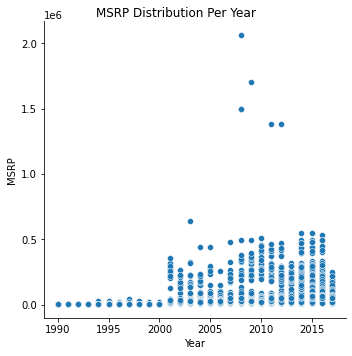

In [48]:
g = sns.relplot(data=df,
            x='Year',
            y='MSRP',
            height=5)

g.fig.suptitle("MSRP Distribution Per Year")

#### Q2: What is the relationship between Engine HP, Engine Cylinders, and MSRP?

Text(0.5, 0.98, 'Engine HP & Engine Cylinder Relationship to MSRP')

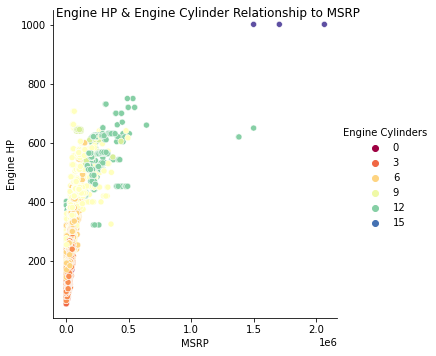

In [49]:
g = sns.relplot(
    data=df,
    x='MSRP',
    y='Engine HP',
    hue="Engine Cylinders",
    palette='Spectral'
)
g.fig.suptitle("Engine HP & Engine Cylinder Relationship to MSRP")

#### Q3: Which brand of cars are the most popular?

Text(0.5, 0.98, 'Car Make and Their Popularity')

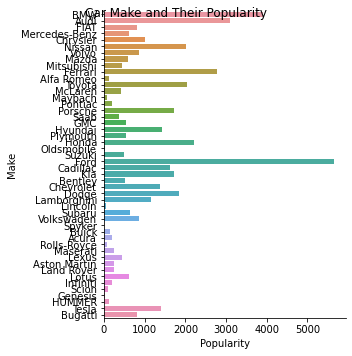

In [50]:
g = sns.catplot(
    data=df,
    x="Popularity",
    y="Make",
    kind="bar"
)
g.fig.suptitle("Car Make and Their Popularity")

### Data Cleaning

#### I dropped 'Model' from the dataset because it is not needed for the prediction model because there are large number of unique values. Dropping Model makes it easier to do one-hot-encoding with less columns in the result df.

In [51]:
df = df.drop(['Model'], axis=1)

In [52]:
df

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


#### Rename Column Names 

In [53]:
df.columns = df.columns.str.lower().str.replace(' ','_')
strings = list(df.select_dtypes(['object']))
print(strings)
for column in strings:
    df[column] = df[column].str.lower().str.replace(" ", "_")
df

['make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']


,make,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


#### From our Data Visualization, there were outliers that should be removed. Otherwise, the data would be more skewed.

In [54]:
df = df[(df['msrp'] > 0) & (df['msrp'] < 300000)]
df

,make,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


#### Fix the Missing Data

In [55]:
import warnings
warnings.filterwarnings('ignore')
df['engine_fuel_type'] = df['engine_fuel_type'].fillna(method='ffill')
df['engine_hp'] = df['engine_hp'].fillna(method='ffill')
df['engine_cylinders'] = df['engine_cylinders'].fillna(method='ffill')
df['number_of_doors'] = df['number_of_doors'].fillna(method='ffill')

In [56]:
df.isnull().sum()

make                    0
year                    0
engine_fuel_type        0
engine_hp               0
engine_cylinders        0
transmission_type       0
driven_wheels           0
number_of_doors         0
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [57]:
df['market_category'].value_counts()

crossover                                          1110
flex_fuel                                           872
luxury                                              855
luxury,performance                                  673
hatchback                                           641
                                                   ... 
crossover,exotic,luxury,performance                   1
flex_fuel,factory_tuner,luxury,high-performance       1
performance,hybrid                                    1
crossover,exotic,luxury,high-performance              1
exotic,luxury,high-performance,hybrid                 1
Name: market_category, Length: 70, dtype: int64

#### Since the market_category has a large number of missing data and its values are distrubuted without a pattern to use ffill or bffill. Therefore, it is better to disregard the missing values and remove these observations from the dataset entirely. 

In [58]:
df.dropna(axis=0, how='any',inplace=True)

In [59]:
df.isnull().sum()

make                 0
year                 0
engine_fuel_type     0
engine_hp            0
engine_cylinders     0
transmission_type    0
driven_wheels        0
number_of_doors      0
market_category      0
vehicle_size         0
vehicle_style        0
highway_mpg          0
city_mpg             0
popularity           0
msrp                 0
dtype: int64

### Categorical to Numerical Data
* One-Hot-Encoding

In [60]:
def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column],prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
        
    return df

In [61]:
categorical_cols = list(df.select_dtypes(['object']).columns)
df = onehot_encode(df, categorical_cols)

In [62]:
df

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp,make_acura,make_alfa_romeo,...,vehicle_style_convertible,vehicle_style_convertible_suv,vehicle_style_coupe,vehicle_style_crew_cab_pickup,vehicle_style_extended_cab_pickup,vehicle_style_passenger_minivan,vehicle_style_passenger_van,vehicle_style_regular_cab_pickup,vehicle_style_sedan,vehicle_style_wagon
0,2011,335.0,6.0,2.0,26,19,3916,46135,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2011,300.0,6.0,2.0,28,19,3916,40650,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2011,300.0,6.0,2.0,28,20,3916,36350,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2011,230.0,6.0,2.0,28,18,3916,29450,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2011,230.0,6.0,2.0,28,18,3916,34500,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,2012,300.0,6.0,4.0,23,16,204,46120,1,0,...,0,0,0,0,0,0,0,0,0,0
11910,2012,300.0,6.0,4.0,23,16,204,56670,1,0,...,0,0,0,0,0,0,0,0,0,0
11911,2012,300.0,6.0,4.0,23,16,204,50620,1,0,...,0,0,0,0,0,0,0,0,0,0
11912,2013,300.0,6.0,4.0,23,16,204,50920,1,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
Y = df['msrp']
X = df.drop('msrp', axis=1)
X.head()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,make_acura,make_alfa_romeo,make_aston_martin,...,vehicle_style_convertible,vehicle_style_convertible_suv,vehicle_style_coupe,vehicle_style_crew_cab_pickup,vehicle_style_extended_cab_pickup,vehicle_style_passenger_minivan,vehicle_style_passenger_van,vehicle_style_regular_cab_pickup,vehicle_style_sedan,vehicle_style_wagon
0,2011,335.0,6.0,2.0,26,19,3916,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2011,300.0,6.0,2.0,28,19,3916,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2011,300.0,6.0,2.0,28,20,3916,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2011,230.0,6.0,2.0,28,18,3916,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2011,230.0,6.0,2.0,28,18,3916,0,0,0,...,1,0,0,0,0,0,0,0,0,0


#### Normalize the data

In [64]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

#### Split into testing and train sets

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((6461, 160), (6461,), (1616, 160), (1616,))

### Linear Regression Model

In [66]:
model_linear = LinearRegression().fit(X_train, Y_train) 
print("Linear Regression Accuracy: " + str(model_linear.score(X_train, Y_train)))

Linear Regression Accuracy: 0.9106252637574906


#### 5-Fold Cross Validation

In [67]:
result = cross_val_score(model_linear, X_train, Y_train, cv=5, n_jobs=-1)
result

array([ 8.98266582e-01, -8.22118523e+24, -1.23301287e+23, -1.37322754e+23,
       -3.70511526e+24])

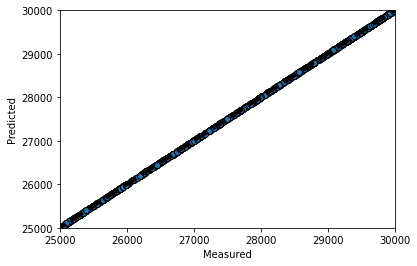

In [68]:
predicted = cross_val_predict(model_linear, df, Y, cv=5)
fig, ax = plt.subplots()
ax.scatter(Y, predicted, edgecolors=(0, 0, 0))
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.xlim(25000, 30000)
plt.ylim(25000, 30000)
plt.show()

In [69]:
Y_test_pred_linear = model_linear.predict(X_test)
# The mean squared error:
print('Mean squared error: %.2f' % mean_squared_error(Y_test, Y_test_pred_linear))

# The coefficient of determination (1 is perfect prediction):
print('Coefficient of determination: %.2f' % r2_score(Y_test, Y_test_pred_linear))

Mean squared error: 187739809.37
Coefficient of determination: 0.90


Text(0, 0.5, 'Predicted Y')

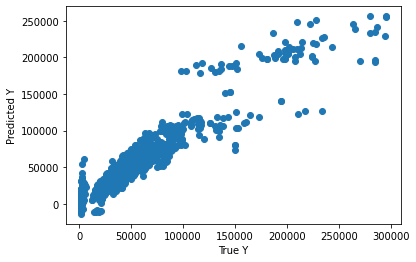

In [70]:
plt.scatter(Y_test,Y_test_pred_linear)
plt.xlabel('True Y')
plt.ylabel('Predicted Y')

### Ridge Regression Model



In [71]:
model_ridge = Ridge().fit(X_train, Y_train)
print("Ridge Regression: " + str(model_ridge.score(X_train, Y_train)))

Ridge Regression: 0.9106256133295715


In [72]:
result = cross_val_score(model_ridge, X_train, Y_train, cv=5, n_jobs=-1)
result

array([0.89857097, 0.91043709, 0.90510952, 0.90157853, 0.89357034])

#### 5-Fold Cross Validation

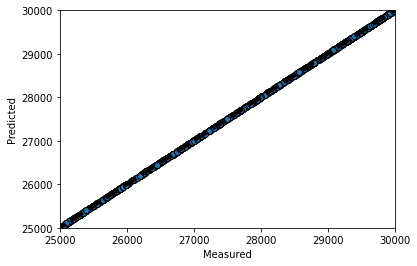

In [80]:
predicted = cross_val_predict(model_ridge, df, Y, cv=5)
fig, ax = plt.subplots()
ax.scatter(Y, predicted, edgecolors=(0, 0, 0))
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.xlim(25000, 30000)
plt.ylim(25000, 30000)
plt.show()

In [81]:
Y_test_pred_ridge = model_ridge.predict(X_test)

# The mean squared error:
print('Mean squared error: %.2f' % mean_squared_error(Y_test, Y_test_pred_ridge))

# The coefficient of determination (1 is perfect prediction):
print('Coefficient of determination: %.2f' % r2_score(Y_test, Y_test_pred_ridge))

Mean squared error: 187677993.84
Coefficient of determination: 0.90


Text(0, 0.5, 'Predicted Y')

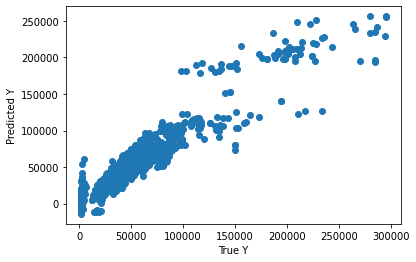

In [82]:
plt.scatter(Y_test,Y_test_pred_ridge)
plt.xlabel('True Y')
plt.ylabel('Predicted Y')

### Lasso Regression Model

In [83]:
model_lasso = Lasso().fit(X_train, Y_train)
print("Lasso Regression: " + str(model_lasso.score(X_train, Y_train)))

Lasso Regression: 0.9106252227411811


In [84]:
result = cross_val_score(model_lasso, X_train, Y_train, cv=5, n_jobs=-1)
result

array([0.89855285, 0.91045029, 0.90514501, 0.90157828, 0.89350411])

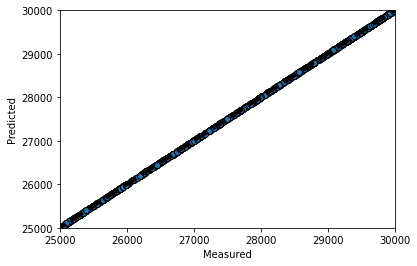

In [85]:
predicted = cross_val_predict(model_lasso, df, Y, cv=5)
fig, ax = plt.subplots()
ax.scatter(Y, predicted, edgecolors=(0, 0, 0))
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.xlim(25000, 30000)
plt.ylim(25000, 30000)
plt.show()

In [86]:
Y_test_pred_lasso = model_lasso.predict(X_test)

# The mean squared error:
print('Mean squared error: %.2f' % mean_squared_error(Y_test, Y_test_pred_lasso))

# The coefficient of determination (1 is perfect prediction):
print('Coefficient of determination: %.2f' % r2_score(Y_test, Y_test_pred_lasso))

Mean squared error: 187699518.54
Coefficient of determination: 0.90


Text(0, 0.5, 'Predicted Y')

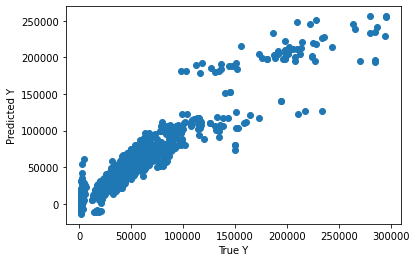

In [87]:
plt.scatter(Y_test,Y_test_pred_lasso)
plt.xlabel('True Y')
plt.ylabel('Predicted Y')

### Random Forest Regressor Model

In [88]:
model_rfr = RandomForestRegressor(random_state=42).fit(X_train, Y_train)
print("Random Forest Regressor: " + str(model_rfr.score(X_train, Y_train)))

Random Forest Regressor: 0.9920828068629609


#### 5-Fold Cross Validation

In [89]:
result = cross_val_score(model_rfr, X_train, Y_train, cv=5, n_jobs=-1)
result

array([0.96874483, 0.97019993, 0.95732949, 0.97527034, 0.95241959])

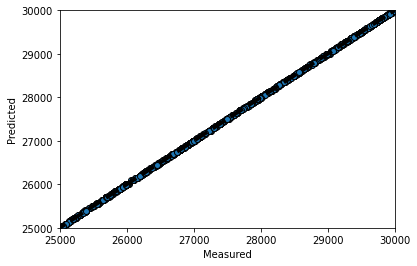

In [90]:
predicted = cross_val_predict(model_rfr, df, Y, cv=5)
fig, ax = plt.subplots()
ax.scatter(Y, predicted, edgecolors=(0, 0, 0))
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.xlim(25000, 30000)
plt.ylim(25000, 30000)
plt.show()

In [91]:
Y_test_pred_rfr = model_rfr.predict(X_test)

# The mean squared error:
print('Mean squared error: %.2f' % mean_squared_error(Y_test, Y_test_pred_rfr))

# The coefficient of determination (1 is perfect prediction):
print('Coefficient of determination: %.2f' % r2_score(Y_test, Y_test_pred_rfr))

Mean squared error: 36634313.65
Coefficient of determination: 0.98


Text(0, 0.5, 'Predicted Y')

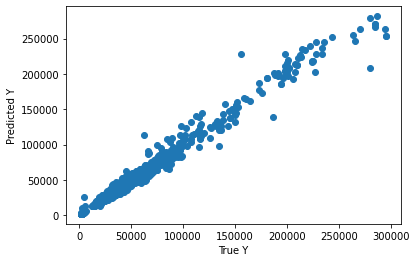

In [92]:
plt.scatter(Y_test,Y_test_pred_rfr)
plt.xlabel('True Y')
plt.ylabel('Predicted Y')